In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/amen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_excel("../iter4/data/encoding.xlsx")
df.head(2)

,index,match_id,big_age,program_type,big_race_ethnicity,rationale_for_match,little_participant__race_ethnicity,match_length,avg_cadence_day,max_cadence_day,...,sentiment_change,sentiment_trend,rigidity,fixed_schedule,income_level,stability,big_age_match_start,little_age_match_start,same_gender,race_similarity
0,0,a1v2J0000027CWYQA2,25,Site,Asian;,Both Big and Little didn't list any specific p...,Asian,5.5,35.0,56,...,0.2265,Stable,1,0,1,1,18,12,True,0.000000
1,1,a1v2J0000027CWfQAM,26,Site,White or Caucasian;,Distance 13.4 miles (23 minutes). L_first_name...,Black or African American,8.5,46.2,83,...,-0.0037,Stable,1,0,1,2,19,11,True,0.166667


In [4]:
df.columns

Index(['index', 'match_id', 'big_age', 'program_type', 'big_race_ethnicity',
       'rationale_for_match', 'little_participant__race_ethnicity',
       'match_length', 'avg_cadence_day', 'max_cadence_day', 'std',
       'call_count', 'topic_consistency', 'shared_interest', 'career',
       'location', 'family', 'volunteering', 'early_stage_score',
       'late_stage_score', 'sentiment_change', 'sentiment_trend', 'rigidity',
       'fixed_schedule', 'income_level', 'stability', 'big_age_match_start',
       'little_age_match_start', 'same_gender', 'race_similarity'],
      dtype='object')

In [5]:
df2 = pd.read_excel("../iter4/data/feng.xlsx")

In [6]:
df2.columns

Index(['index', 'match_id', 'big_age', 'big_occupation', 'big_gender',
       'program', 'program_type', 'big_race_ethnicity', 'rationale_for_match',
       'little_gender', 'little_participant__race_ethnicity', 'match_length',
       'big_birthdate', 'match_activation_date', 'little_birthdate',
       'avg_cadence_day', 'max_cadence_day', 'std', 'call_count',
       'early_stage_notes', 'late_stage_notes', 'topic_consistency',
       'shared_interest', 'career', 'location', 'family', 'volunteering',
       'early_stage_score', 'late_stage_score', 'sentiment_change',
       'sentiment_trend'],
      dtype='object')

In [7]:
sample = df2[["match_id", "early_stage_notes", "late_stage_notes"]].copy()

In [8]:
df = pd.merge(df, sample, how="left", on="match_id")

In [9]:
# Vectorize early and late contact notes separately
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=500)
early_matrix = vectorizer.fit_transform(df['early_stage_notes'].fillna(''))
late_matrix = vectorizer.transform(df['late_stage_notes'].fillna(''))

# Convert to DataFrame for analysis
early_keywords = pd.DataFrame(early_matrix.toarray(), columns=vectorizer.get_feature_names_out())
late_keywords = pd.DataFrame(late_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Compute frequency difference
keyword_diff = (late_keywords.mean() - early_keywords.mean()).sort_values(ascending=False)
print("Keywords that increase in frequency over time:\n", keyword_diff.head(10))
print("\nKeywords that decrease in frequency over time:\n", keyword_diff.tail(10))


Keywords that increase in frequency over time:
 year               1.069240
matches year       0.888174
safety reminder    0.648897
matches            0.602635
youth              0.593444
reminder           0.564032
updates            0.483150
months             0.477635
goal               0.459559
moving             0.433824
dtype: float64

Keywords that decrease in frequency over time:
 question child     -4.816789
activities         -5.084559
bb                 -5.260110
child              -5.729779
said               -5.962623
answer question    -6.034620
bs                 -6.568627
mec                -6.977022
question          -12.577819
answer            -12.938419
dtype: float64


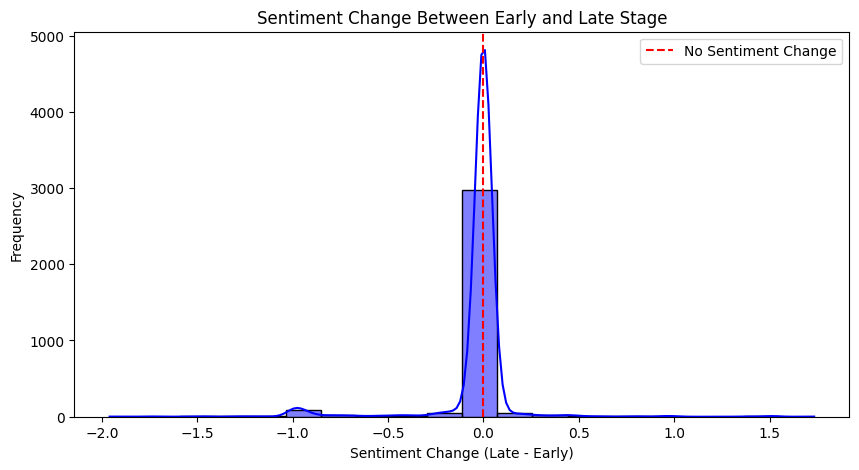

In [10]:

# 🚀 1️⃣ Sentiment Change Over Match Stages
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment_change'], bins=20, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="--", label="No Sentiment Change")
plt.title("Sentiment Change Between Early and Late Stage")
plt.xlabel("Sentiment Change (Late - Early)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

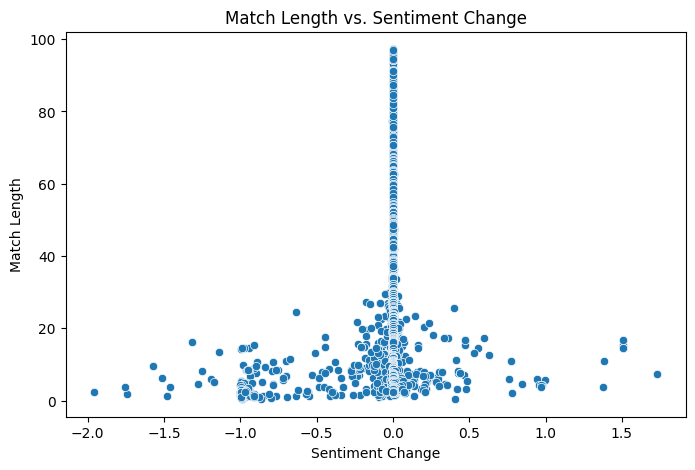

In [23]:
# 🚀 3️⃣ Sentiment vs. Match Length
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sentiment_change'], y=df['match_length'])
plt.title("Match Length vs. Sentiment Change")
plt.xlabel("Sentiment Change")
plt.ylabel("Match Length")
plt.show()

In [27]:
df.columns

Index(['index', 'match_id', 'big_age', 'program_type', 'big_race_ethnicity',
       'rationale_for_match', 'little_participant__race_ethnicity',
       'match_length', 'avg_cadence_day', 'max_cadence_day', 'std',
       'call_count', 'topic_consistency', 'shared_interest', 'career',
       'location', 'family', 'volunteering', 'early_stage_score',
       'late_stage_score', 'sentiment_change', 'sentiment_trend', 'rigidity',
       'fixed_schedule', 'income_level', 'stability', 'big_age_match_start',
       'little_age_match_start', 'same_gender', 'race_similarity',
       'early_stage_notes', 'late_stage_notes'],
      dtype='object')

<Axes: xlabel='sentiment_trend', ylabel='match_length'>

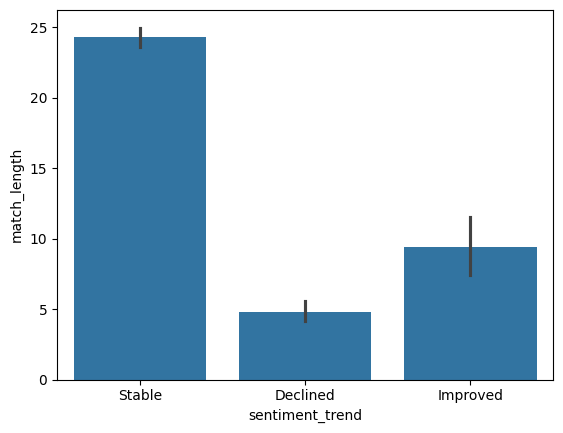

In [33]:
sns.barplot(x=df['sentiment_trend'], y=df['match_length'])

<Axes: xlabel='early_stage_score', ylabel='match_length'>

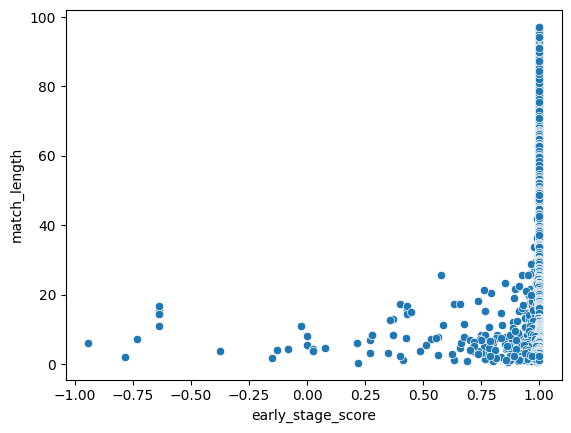

In [31]:
sns.scatterplot(x=df["early_stage_score"], y=df['match_length'])

In [34]:
df.to_excel("sample.xlsx", index=False)